### Autor: Jakub Kozak
### Grupa: 4
### Zbiór danych: wine dataset
### Sieć: SOM

In [4]:
!pip install MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=013a568ccb5d8e69c311aa85f1e8fa35c984fad5caafe1c8533d9e78520680a3
  Stored in directory: c:\users\maury\appdata\local\pip\cache\wheels\28\e3\3d\707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built MiniSom


In [5]:
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [205]:
!pip install hyperopt

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 330.3 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.6 MB 409.6 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.6 MB 853.3 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.6 MB 908.0 kB/s eta 0:00:02
     ---------- ----------------------------- 0.4/1.6 MB 1.6 MB/s eta 0:00:01
     ---------------- ----------------------- 0.7/1.6 MB 2.2 MB/s eta 0:00:01
     ------------------------------ --------- 1.2/1.6 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 3.9 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/200.5 kB ? eta -:--:--
     ---------------------------------------- 200.5/200.5 kB ? eta 0:00:00


In [144]:
from minisom import MiniSom
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pobranie zbioru

In [145]:
wine = fetch_ucirepo(id=109) 

X = wine.data.features 
y = wine.data.targets
label_names = {1:'First', 2:'Second', 3:'Third'}

In [146]:
wine.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


In [147]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [148]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


# Normalizacja

In [149]:
scaler = MinMaxScaler(feature_range=(0,1))
X_normalized = scaler.fit_transform(X)

In [160]:
print(X_normalized)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


# Początkowa konfiguracja sieci

Heurystyka: M ≈ 5 sqrt(N), gdzie M to liczba neuronów, a N liczba obserwacji.

Sigma musi być odpowiednia do rozmiarów mapy (sigma < x/2 i sigma < y/2). Resztę wartości wybrałem losowo. Co do pozostałych własności SOM, to domyślnie za funkcje sąsiedztwa przyjąłem funkcje Gaussa i prostokątną topologie mapy.

## Parametry
- x - kolumny (neurony)
- y - wiersze (neurony)
- sigma - promień sąsiedztwa, wpływa na szybkość uczenia się sąsiednich neuronów w każdej iteracji
- learning_rate - współczynnik uczenia
- iteracje

## Minimalizacja błędu
Oceniając wydajnosć sieci skupiłem sie na dwóch rodzajach błędów: quantization_error i topographic_error.

topographic_error: miara jak dobrze struktura danych została zachowana na mapie. Liczona jako ilość obserwacji, w których najlepiej pasujący element nie jest sąsiadem drugiego najlepiej pasującego elementu. Przyjmuje wartości od 0 (wszystkie wspomniane elementy są sąsiadami) do 1 (wspomniane elementy nie sąsiadują ze sobą). Im niższa wartość tym lepiej.

quantization_error: średni dystans od elementów wejściowych do odpowiadającym im wygranym neuronom. Zmniejsza się wraz ze zwiększaniem się mapy, więc nie może służyć do porównywania map o różnych rozmiarach, co oznacza, że rozmiar mapy powinien pozostać stały.

Poniżej widzimy, jak oba te błędy zmniejszają się wraz z kolejnymi iteracjami, co pozwala nam wybrać ich odpowiedniejszą ilość.

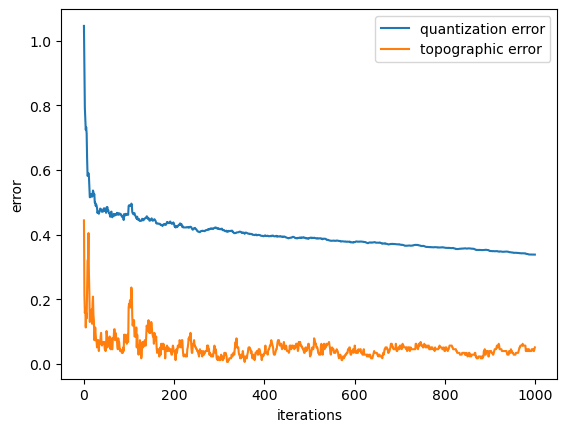

In [196]:
som = MiniSom(8, 8, X_normalized.shape[1], sigma=2., learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10, topology='rectangular')

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_normalized))
    som.update(X_normalized[rand_i], som.winner(X_normalized[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_normalized))
    t_error.append(som.topographic_error(X_normalized))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iterations')
plt.legend()
plt.show()

## Pierwsze wyniki

Otrzymane błędy są dość małe, co wskazywałoby na dobre dobranie parametrów i/lub zestaw danych przychylny temu rodzajowi sieci. Niestety powyższa metoda za każdym razem generuje inne (choć bardzo zbliżone) wyniki, także w celu większej wygody i łatwiejszego porównywania używam dalej metod som.random_weights_init i som.train_random, które de facto robią to samo.

In [224]:
som = MiniSom(8, 8, X_normalized.shape[1], sigma=2., learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10, topology='rectangular')

som.random_weights_init(X_normalized)
som.train_random(data = X_normalized, num_iteration = 1000)

In [226]:
print(som.quantization_error(X_normalized))
print(som.topographic_error(X_normalized))

0.3408345174336299
0.06179775280898876


## U-Matrix

W celu lepszego pokazania rezultatów używam U-Matrix, gdzie neurony są przedstawione jako tablica komórek, kolor reprezentuje dystans od sąsiednich neuronów (im jaśniej tym bliżej siebie są neurony). W komórki wpisane są znaczniki reprezentujące jak dane 'mapują' się na sieć. Im mniej nakładających się znaczników tym lepiej - świadczy to o lepszym pogrupowaniu danych. Poniżej wyraźnie widać odrębne rejony, w których dominują określone typy, w tym przypadku, win. Jak widać zgodnie z założeniem jasno wyodrębniamy ich trzy rodzaje.

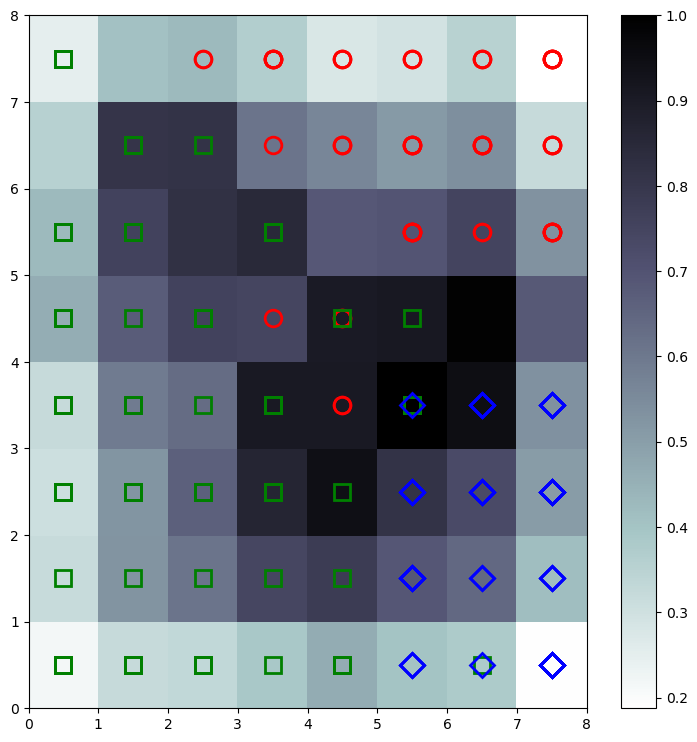

In [225]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

markers = ['o', 's', 'D']
colors = ['r','g','b']
for cnt, xx in enumerate(X_normalized):
    w = som.winner(xx)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[cnt]) - 1], markerfacecolor='None',
             markeredgecolor=colors[int(y[cnt]) - 1], markersize=12, markeredgewidth=2)

plt.show()

# Optymalizacja

Używam tutaj biblioteki hyperopt. Dobór parametrów odbywa się na podstawie szukania najmniejszej wartości określonego przez nas błędu. Wykorzystywane jest do tego tak zwane Bayesian optimization. Nie znalazłem informacji na temat tego jaki algorytm kryje sie pod tpe.suggest.

In [207]:
from hyperopt import fmin, tpe, hp

## Sposób na minimalizacje jednego wskaźnika błędu poprzez dostrajanie parametru sigma

### quantization_error

Rzeczywiście quantization_error zmniejszył się, ale w tym wypadku znacznym kosztem topographic_error i prawie niezauważalnie. Jak widać poniżej nowa wartość sigma zmienia drastycznie mapę, pogarszając poprzedni rezultat.

In [208]:
best = fmin(fn =lambda sig: MiniSom(8, 8, X_normalized.shape[1], sigma=2., learning_rate=.5).quantization_error(X_normalized),
           space=hp.uniform("sig", 0.001, 8 / 2.01),
           algo=tpe.suggest,
           max_evals=200)
print(best)

100%|██████████| 200/200 [00:00<00:00, 381.46trial/s, best loss: 1.0871351853318334]
{'sig': 0.510185347901734}


In [229]:
sigma = best['sig']

som = MiniSom(8, 8, X_normalized.shape[1], sigma=sigma, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=10, topology='rectangular')

som.random_weights_init(X_normalized)
som.train_random(data = X_normalized, num_iteration = 1000)

print(som.quantization_error(X_normalized))
print(som.topographic_error(X_normalized))

0.2528540363625474
0.8595505617977528


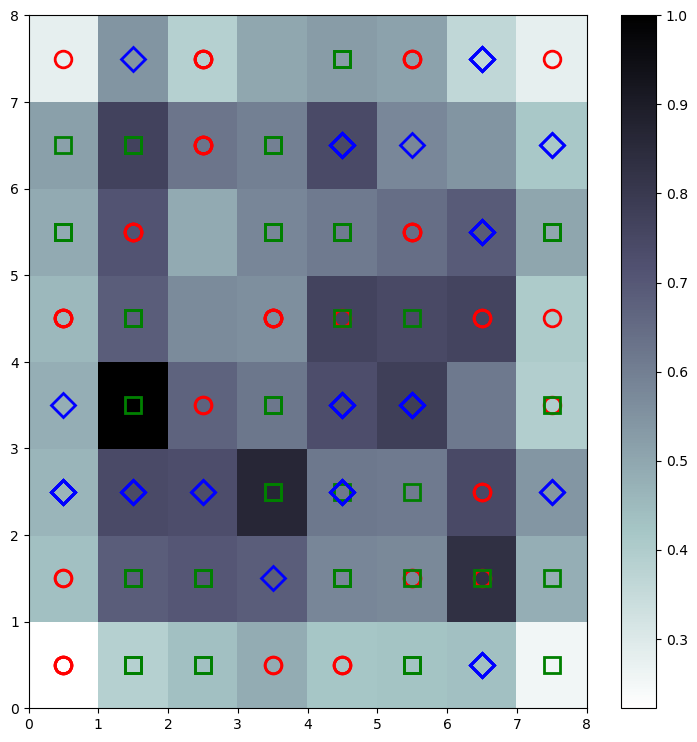

In [230]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

markers = ['o', 's', 'D']
colors = ['r','g','b']
for cnt, xx in enumerate(X_normalized):
    w = som.winner(xx)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[cnt]) - 1], markerfacecolor='None',
             markeredgecolor=colors[int(y[cnt]) - 1], markersize=12, markeredgewidth=2)

plt.show()

### topographic_error

W tym wypadku mamy sytuacje odwrotną. Dostosowanie sigma pod kątem topographic_error znacząco zmniejsza nam dany błąd jednocześnie praktycznie nie wpływając na quantization_error. Otrzymujemy też lepiej uporządkowaną mapę.

In [231]:
best = fmin(fn =lambda sig: MiniSom(8, 8, X_normalized.shape[1], sigma=2., learning_rate=.5).topographic_error(X_normalized),
           space=hp.uniform("sig", 0.001, 8 / 2.01),
           algo=tpe.suggest,
           max_evals=200)
print(best)

100%|██████████| 200/200 [00:00<00:00, 343.11trial/s, best loss: 0.19662921348314608]
{'sig': 2.168968361770193}


In [232]:
sigma = best['sig']

som = MiniSom(8, 8, X_normalized.shape[1], sigma=sigma, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=10, topology='rectangular')

som.random_weights_init(X_normalized)
som.train_random(data = X_normalized, num_iteration = 1000)

print(som.quantization_error(X_normalized))
print(som.topographic_error(X_normalized))

0.34639987651196086
0.033707865168539325


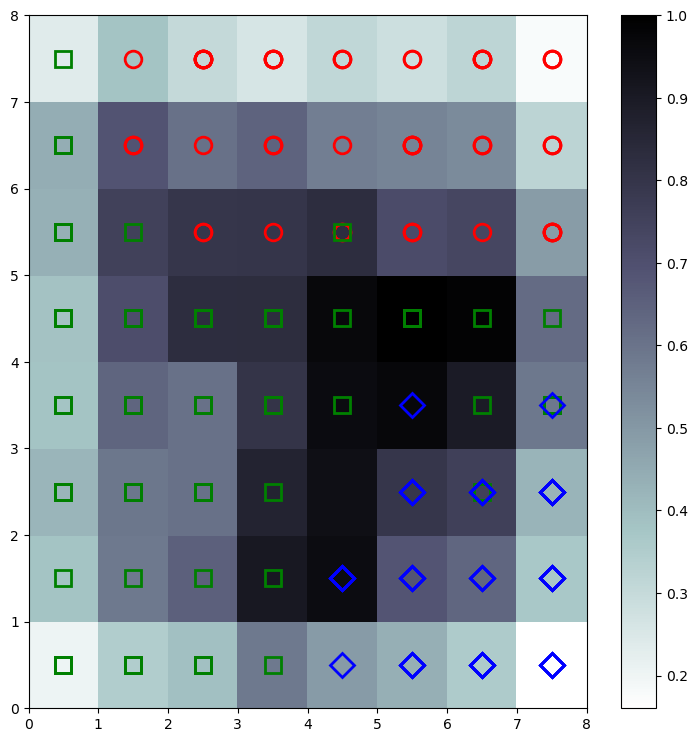

In [233]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

markers = ['o', 's', 'D']
colors = ['r','g','b']
for cnt, xx in enumerate(X_normalized):
    w = som.winner(xx)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[cnt]) - 1], markerfacecolor='None',
             markeredgecolor=colors[int(y[cnt]) - 1], markersize=12, markeredgewidth=2)

plt.show()

Po niezliczonej ilości prób nie udało mi się lepiej dostosować (raz dostałem lepsze wyniki, ale niestety nie użyłem seed) za pomocą tej metody (i innej biorącej pod uwage oba parametry: sigma i learning_rate) parametru learning_rate, więc ostatecznie zostałem przy wartości początkowej. Dodatkowo natrafiłem na pewne problemy chcąc uwzględnić w tym przypadku zbiory testowe, których nie zdążyłem rozwiązać.